<a href="https://colab.research.google.com/github/jorguzb/DataScienceScript/blob/master/svm_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM en Python 

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# =============================================================================
# Created By  : Henri Michel K
# Created Date: Wed May 05 18:54:00 UTC 2021
# =============================================================================


Importons le dataset que nous utiliserons dans ce tutoriel

In [ ]:
#Import scikit-learn dataset library
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
wine_dataset = datasets.load_wine()

## Exploration des données

Apres avoir importé notre jeu de données, nous allons essayer de l'explorer et le visualiser afin d'avoir le maximum d'informations pour notre modélastion

In [ ]:
#On a un dictionnaire python  dont les différentes clés sont
# 'data', 'target', 'target_names', 'DESCR', 'feature_names'
print(wine_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [ ]:
# les features
print("Features: ", wine_dataset.feature_names)


Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


On voit donc qu'on a 3 labels ce qui voudrait dire qu'on à affaire à différentes catégories de vin. Transformons tout ça en un dataFrame Pandas

In [ ]:
wine_dataframe = pd.DataFrame(data=wine_dataset['data'],columns=wine_dataset['feature_names'])
#On ajoute la colonne target ensuite
wine_dataframe['target'] = wine_dataset['target']
# Puis le nom des targets
wine_dataframe['class']=wine_dataframe['target'].map(lambda target_name: wine_dataset['target_names'][target_name])



In [ ]:
wine_dataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [ ]:
wine_dataframe.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Un peu de visualisation

Le describe nous dit que la moyenne d'alcool contenu dans les vins est d'envrion 13%. Essayons de visualiser la distribution d'alcool pour chaque catégorie de vin.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

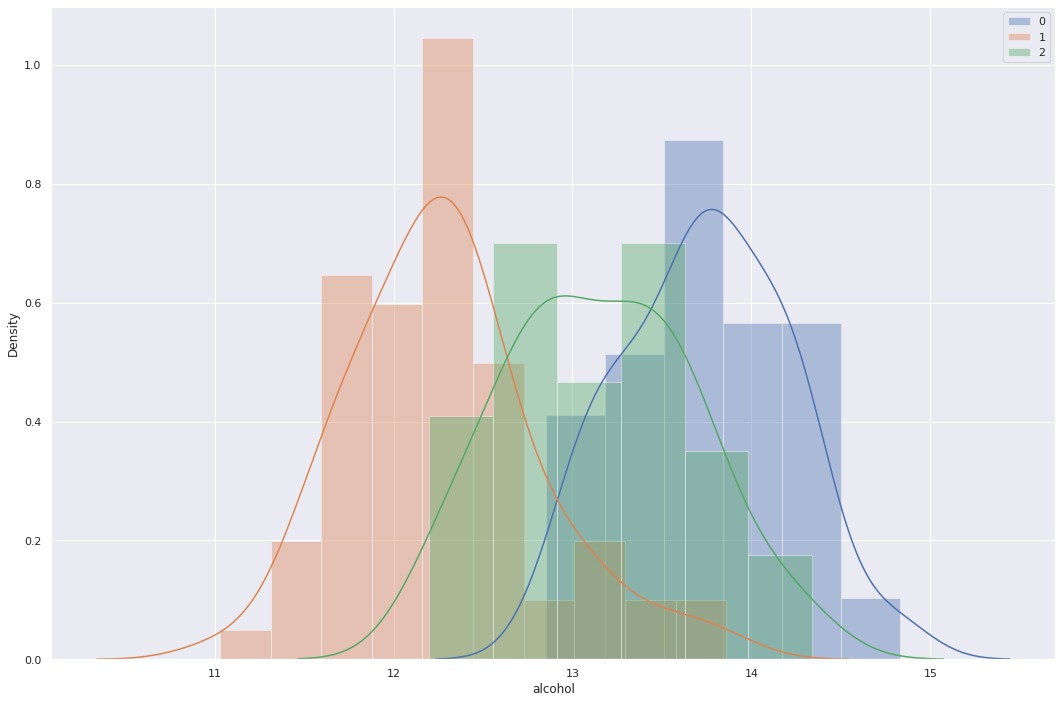

In [ ]:
sns.set(rc={'figure.figsize':(18,12)})

for i in wine_dataframe.target.unique():
    sns.distplot(wine_dataframe['alcohol'][wine_dataframe.target==i],
                 kde=1,label='{}'.format(i))

plt.legend()

On s'appercoit que les distributuions semblent plutôt normales et peuvent être classée en 3 groupes. Les vins faible en teneur d'alcool,les vins en teneur d'alcool moyenne , et les vins forts. On peut s'amuser à analyser d'autres caractérisques mais notre objectif dans ce tutoriel est de montrer l'utilisation du svm. 

## Créarion du Modèle


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(wine_dataset['data'],wine_dataset['target'],
                     test_size=0.2)


In [ ]:
X_train

array([[1.184e+01, 8.900e-01, 2.580e+00, ..., 7.900e-01, 3.080e+00,
        5.200e+02],
       [1.410e+01, 2.160e+00, 2.300e+00, ..., 1.250e+00, 3.170e+00,
        1.510e+03],
       [1.434e+01, 1.680e+00, 2.700e+00, ..., 5.700e-01, 1.960e+00,
        6.600e+02],
       ...,
       [1.372e+01, 1.430e+00, 2.500e+00, ..., 8.900e-01, 2.870e+00,
        1.285e+03],
       [1.305e+01, 1.770e+00, 2.100e+00, ..., 8.800e-01, 3.350e+00,
        8.850e+02],
       [1.305e+01, 1.650e+00, 2.550e+00, ..., 1.120e+00, 2.510e+00,
        1.105e+03]])

Nous pouvons dès à présent créer notre SVM dans sklearn cela consiste à créer un objet SVC (support vector classificator). L'un des paramètres importants est le  noyau 'kernel', comme présenté plus haut, c'est une fonction qui sert à transformer les données dans une représentation spécifique. 
Les SVM utilisent différents types de fonctions noyau. Ces fonctions sont de différents types, par exemple, linéaire, non linéaire, polynomiale, fonction de base radiale (RBF) et sigmoïde. 
Il faut donc avoir une attention particulière sur ce paramètre. Je vous laisse la documentation de scikit-learn sur les kernel pour mieux approfondir ce point. 
Dans notre cas nous choisirons un kernel linéaire (pourquoi ;) )

In [ ]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
#Prediction sur le Test set
y_pred = classifier.predict(X_test)

In [ ]:
y_pred 

array([1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.93      0.82      0.87        17
           2       0.71      0.83      0.77         6

    accuracy                           0.89        36
   macro avg       0.86      0.89      0.87        36
weighted avg       0.90      0.89      0.89        36



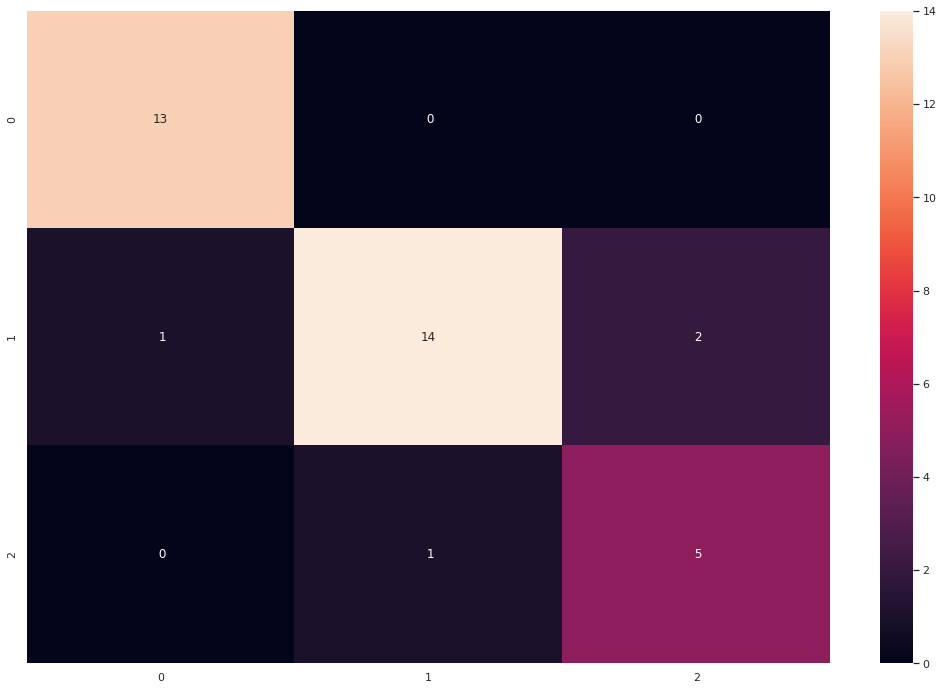

In [ ]:
#making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')